/home/frederik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


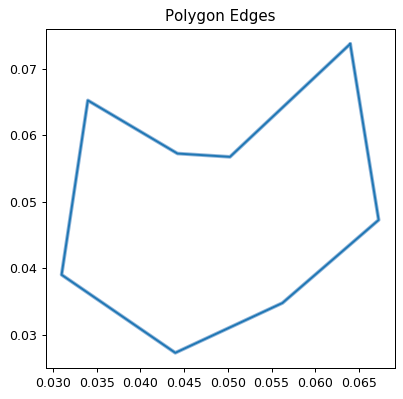

In [6]:
from stl import mesh

from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
import numpy as np
from numpy import random
from shapely.geometry import Polygon
from numpy.random import random
from numpy.random import randint
from scipy.spatial import Delaunay
from scipy import interpolate
from datetime import datetime
plot=True
import os
import glob


from mpl_toolkits.mplot3d import Axes3D
#%matplotlib notebook
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
#%matplotlib inline
import stl

from datetime import datetime
from shutil import copy


high=100
low=50
low2=50
a=randint(low,high)
b=randint(low,high)
c=randint(0,low2)
d=randint(0,low2)
g=randint(low,high)
h=randint(low,high)
e=randint(0,low2)
f=randint(0,low2)
i=randint(low,high)
j=randint(low,high)
k=randint(0,low2)
l=randint(0,low2)

m=randint(low,high)
n=randint(low,high)
o=randint(0,low2)
p=randint(0,low2)

q=randint(0,1)
r=randint(0,1)


vertices =(0.1+(1/2000* np.array([\
    [a,b],
    [c,d],
    [-e,f],
    [-g,h],
    [-i,-l],
    [-k,-j],
    [o,-n],
    [m,-p]
    ])))/2


polygon = Polygon(vertices)
#polygon.area
if plot==True:
    fig = plt.figure(1, figsize=(5,5), dpi=90)
    x,y = polygon.exterior.xy
    ax = fig.add_subplot(111)
    ax.plot(x, y, color='#6699cc', alpha=0.7,
        linewidth=3, solid_capstyle='round', zorder=2)
    ax.set_title('Polygon')

    ax = fig.add_subplot(111)
    ax.plot(x, y)
    ax.set_title('Polygon Edges')

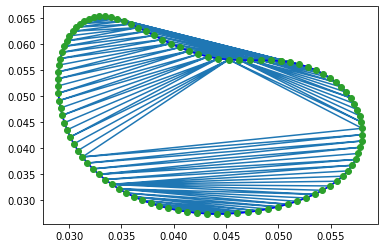

In [7]:

X=vertices[1:,0]
Y=vertices[1:,1]


#tck, u = interpolate.splprep([X, Y], s=0.0)
unew = np.arange(0, 1.01, 0.01)
#out = interpolate.splev(unew, tck)
tck, u = interpolate.splprep([X, Y], s=0, per=True)
out = interpolate.splev(unew, tck)

plt.figure()
plt.plot(out[0], out[1], 'b')


OUT=np.asarray(out)
OUT=np.transpose(OUT)
points=OUT
polygon = Polygon(points)
x,y = polygon.exterior.xy
SplineArea=polygon.area
SplineLength=polygon.length
#points=np.array(,b])
tri = Delaunay(points)
plt.triplot(points[:,0], points[:,1], tri.simplices.copy())
plt.plot(points[:,0], points[:,1], 'o')
plt.show()


In [8]:
SplineDescr="A_%.4f_L%.4f" % (SplineArea,SplineLength)


time=datetime.today().strftime('%Y-%m-%d-%H:%M')
u=str(len(glob.glob('Models/*.stl'))+1)

Home_Folder='/home/frederik/flunnpy'
ModelFolder=os.path.join(Home_Folder,'Models')
#RecentModelName=glob.glob('*.stl')[0]

ModelName="No"+u+"_"+SplineDescr
ModelName=ModelName.replace(".","-")
ModelName=ModelName+".stl"
ModelName
ModelPath=os.path.join(Home_Folder,ModelName)

'/home/frederik/flunnpy/Models/No10_A_0-0008_L0-1074.stl'

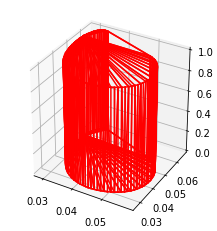

In [9]:


points2=np.zeros((len(points[:,0]),2))
points2=np.append(points,points,axis=0)
zeros=np.zeros((len(points),1))
ones=np.ones((len(points),1))
height=np.append(zeros,ones,axis=0)
height.shape
points3=np.append(points2,height,axis=1)

tri = Delaunay(points3)
#tri.vertices
points3.shape


hull = ConvexHull(points3)
fig = plt.figure(figsize=plt.figaspect(0.5))

ax1 = fig.add_subplot(1, 2, 1,projection='3d')


edges= zip(*points3)
for i in hull.simplices:
    ax1.plot(points3[i,0], points3[i,1], points3[i,2], 'r-')

x_all = np.hstack(hull.points[:,0])
y_all = np.hstack(hull.points[:,1])
z_all=np.hstack(hull.points[:,2])
data = np.zeros(len(hull.simplices),dtype=mesh.Mesh.dtype)
m = mesh.Mesh(data, remove_empty_areas=False)
m.x[:] = x_all[hull.simplices]
m.y[:] = y_all[hull.simplices]
m.z[:]=z_all[hull.simplices]
m.save(ModelName,mode=stl.Mode.ASCII)
#!cp $ModelPath $ModelFolder
copy(ModelPath,ModelFolder)
# Create a new plot
#figure = plt.figure()
#axes = mplot3d.Axes3D(figure)

# Load the STL files and add the vectors to the plot
#your_mesh = mesh.Mesh.from_file(ModelName)
#axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors))

# Auto scale to the mesh size
#scale = your_mesh.points.flatten(-1)
#axes.auto_scale_xyz(scale, scale, scale)
#axes.view_init(90, 90)
# Show the plot to the screen
#plt.show()

